# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive2/HPT/jesus/TITAN_CASES/double_domain/convergence/')
casedir=os.getcwd()

In [4]:
name_for_files='fine_grid'

In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True

In [6]:
mon_point=False
if mon_point:
    mon_point_id=2
    var_index=7
    skip=10
    save_fig=False
    #======================================
    #  end user input
    #======================================

    start_name='monitor_point_%i'%mon_point_id
    files= os.listdir('../mon_point/')
    red_files=[]
    for f in files:
        if f.startswith(start_name):
            temp='../mon_point/'+f
            red_files.append(temp)

    red_files.sort()
    time=[]
    step=[]
    var=[]
    for f in red_files:
        file1=open(f,'r')
        count=1
        for line in file1:
            if count==0:
                li=line.split()
                step.append(float(li[0]))
                time.append(float(li[1]))
                var.append(float(li[var_index]))
                count=10
            else:
                count-=count
    plt.figure()
    plt.plot(step,var)
    plt.xlabel('timestep')
    plt.ylabel('var')
    if save_fig:
        plt.savefig('time_hist_var.pdf')
     

In [7]:
#get list of directories to loop though
postdir =  os.walk('.').next()[1]
postdir = [casedir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [8]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-0.5975987,-0.2],[-0.5975987,0.7]],[[0.9507253,-.75],[0.9507253,0.4]],[[1.0322160,-.75],[1.0322160,0.4]],
    [[1.1408703,-.75],[1.1408703,0.4]],[[1.1951975,-.75],[1.1951975,0.4]],[[1.3038518,-.75],[1.3038518,0.4]],
    [[1.4396697,-.75],[1.4396697,0.4]]]

In [9]:
#Extract lines from each convergence case
inf=lh.infile('../cascade3d.in')
dt=inf.dth
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1].split('_')
        d1=float(d[0])*dt
        d2=float(d[2])*dt
        d="%4.1f to %4.1f"%(d1,d2)
        wake[-1].extr_line(j[0],j[1],200,i+'/STAT_cont.bin',force_read=True,label=d)
        wake[-1].order_ymin()


Extracting line
Found 200 points.
Extracting line
Found 200 points.
Extracting line
Found 145 points.
Extracting line
Found 145 points.
Extracting line
Found 143 points.
Extracting line
Found 143 points.
Extracting line
Found 150 points.
Extracting line
Found 150 points.
Extracting line
Found 156 points.
Extracting line
Found 156 points.
Extracting line
Found 158 points.
Extracting line
Found 158 points.
Extracting line
Found 159 points.
Extracting line
Found 159 points.


Wake profiles for x position:  -0.5975987
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  0.9507253
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.032216
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1408703
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1951975
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.3038518
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.4396697
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


/home/rp3e11/codes/platus/matplotlib2tikz.py:1371: UserWarning: Unknown legend location 0. Using default.
  % obj._loc)


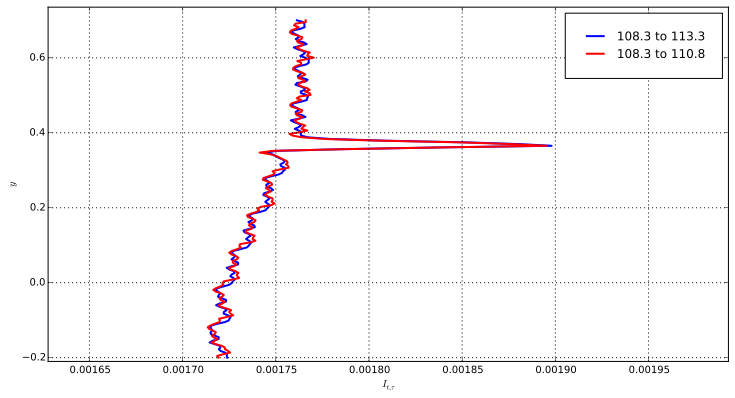

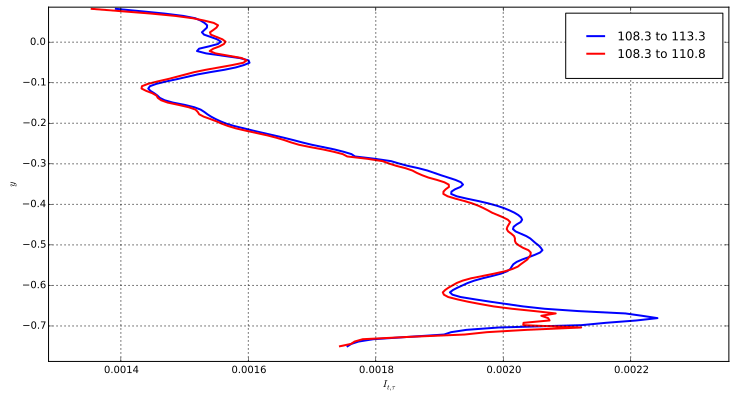

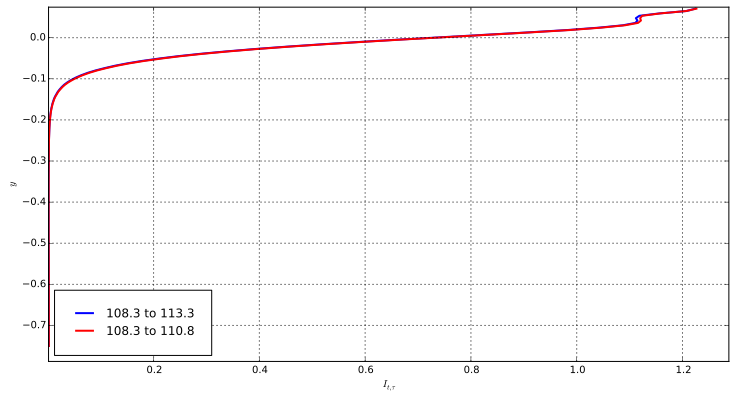

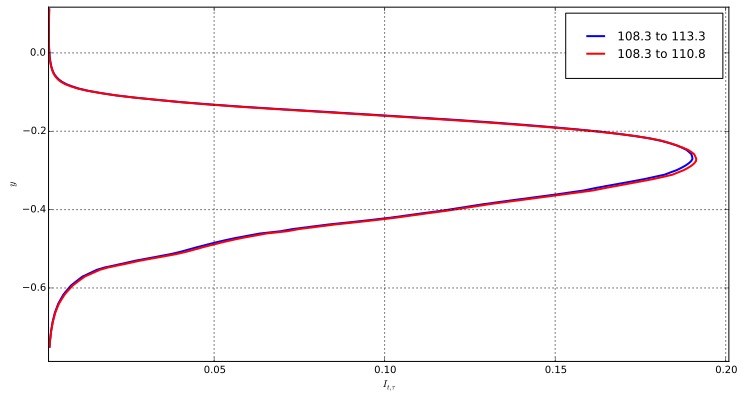

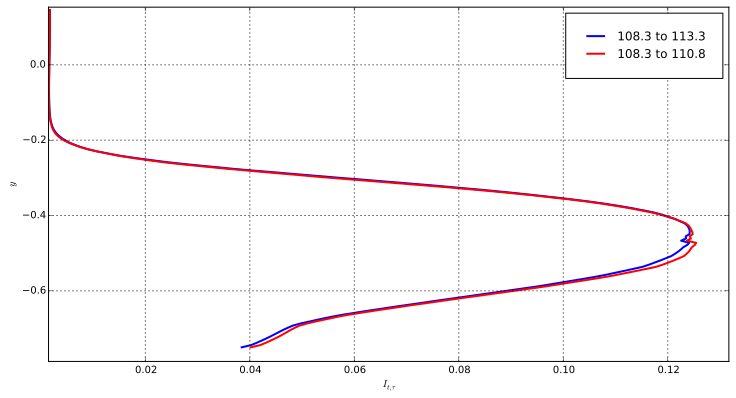

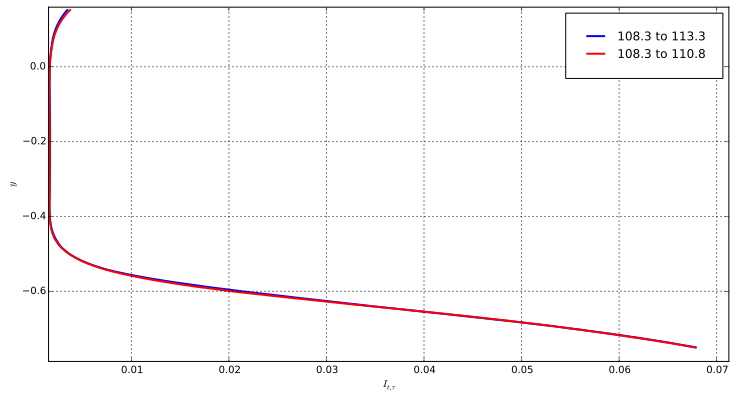

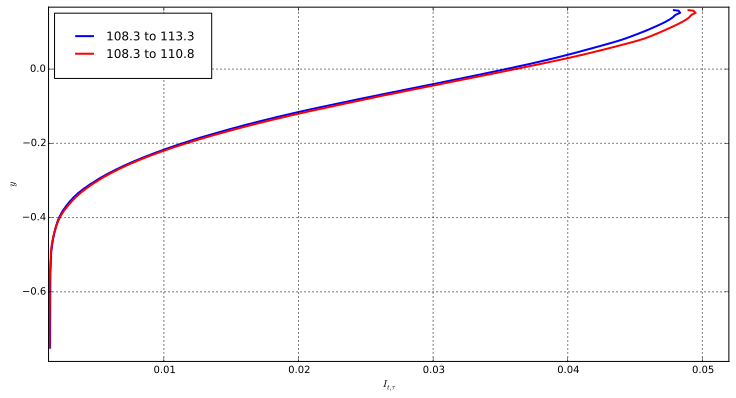

In [10]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(119,4))




for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_TI_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_TI_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.5975987
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9507253
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.032216
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1408703
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1951975
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.3038518
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplots

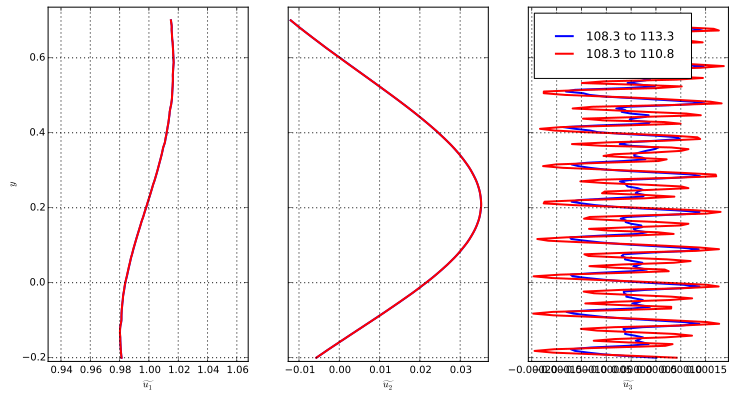

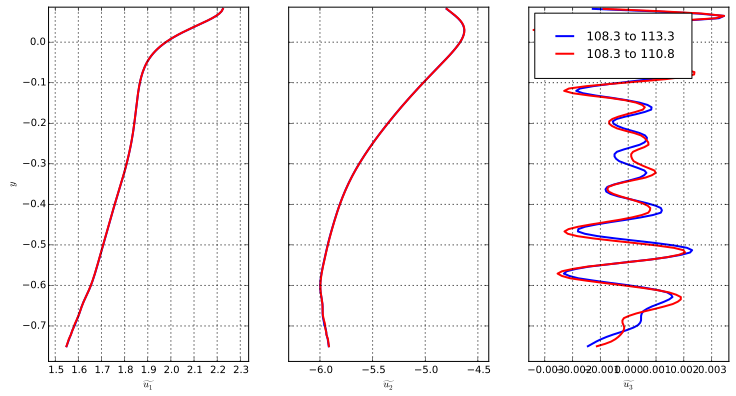

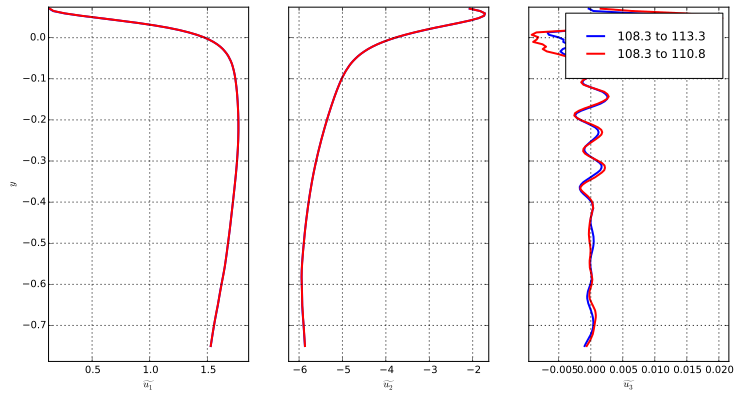

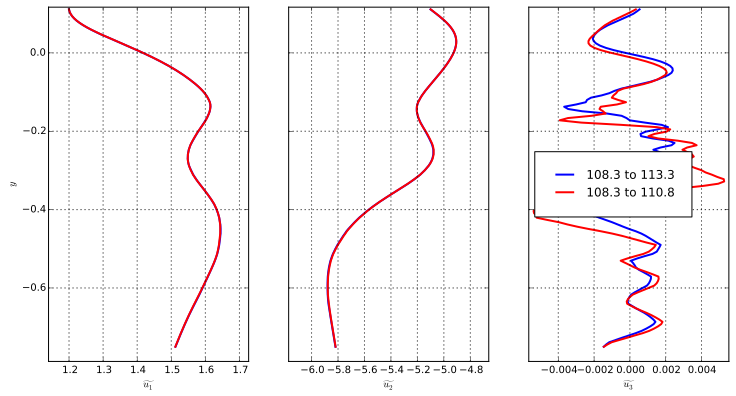

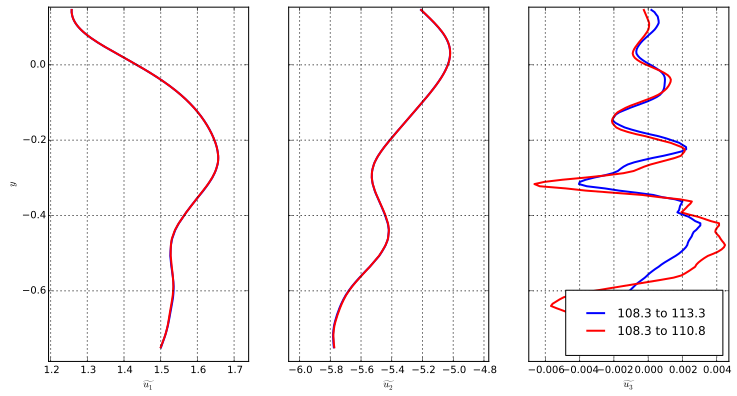

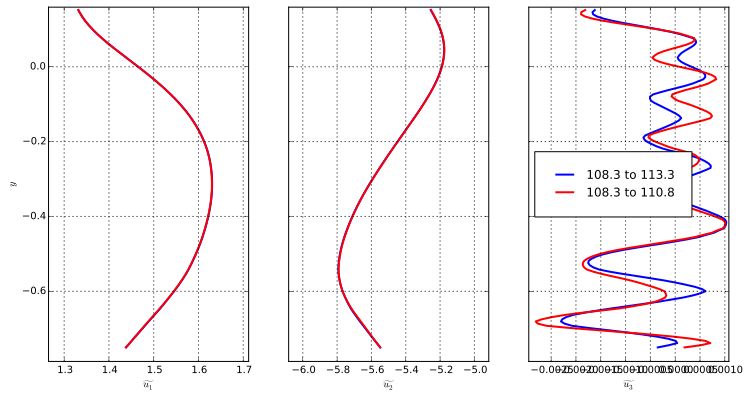

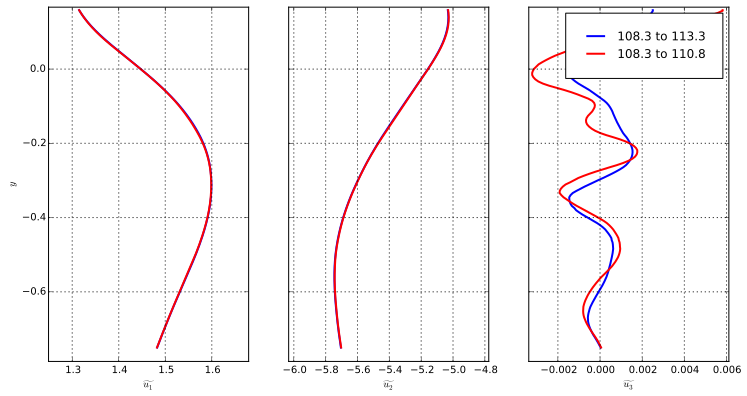

In [11]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,2))
plot_ids.append(wake[0].l[0].var.get_index(101,3))
plot_ids.append(wake[0].l[0].var.get_index(101,16))



for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_mean_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_mean_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.5975987
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9507253
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.032216
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1408703
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1951975
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.3038518
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplots

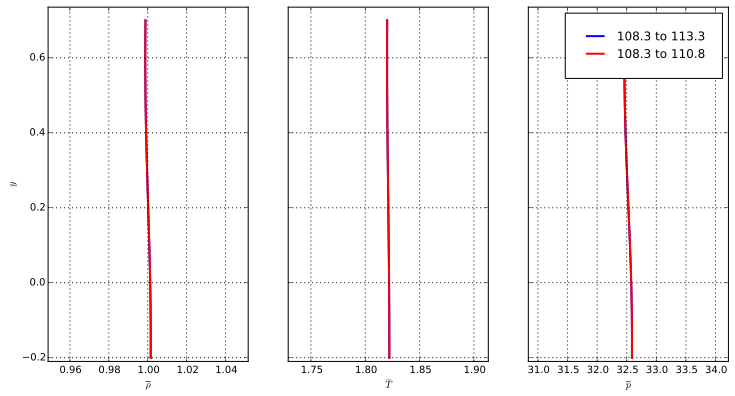

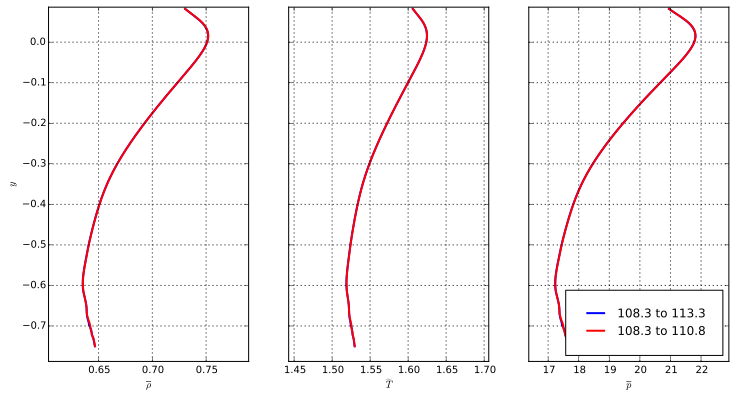

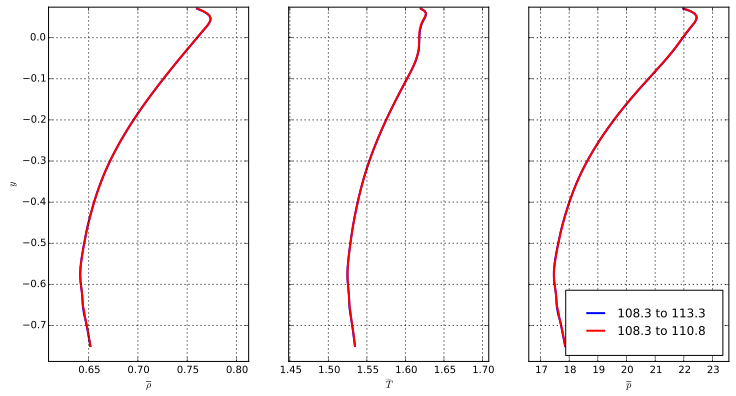

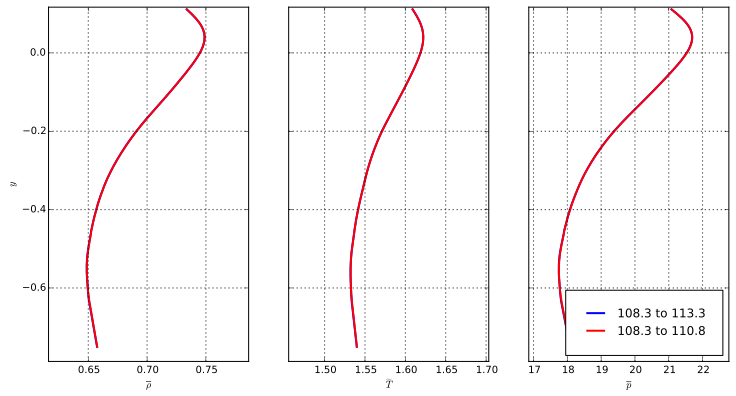

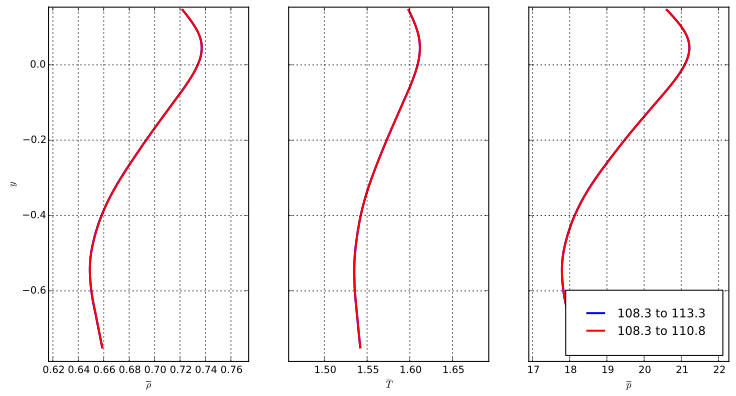

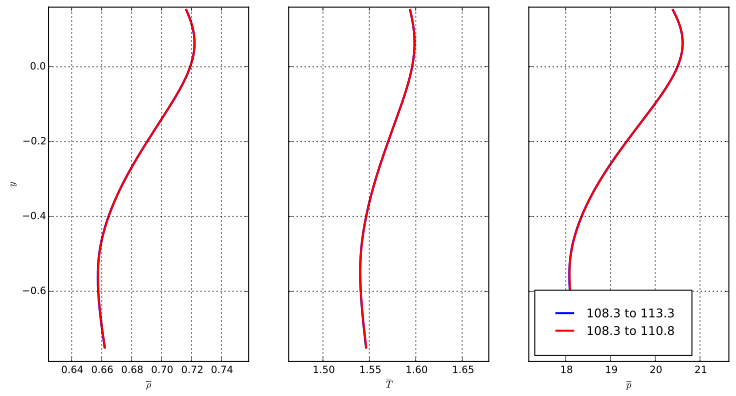

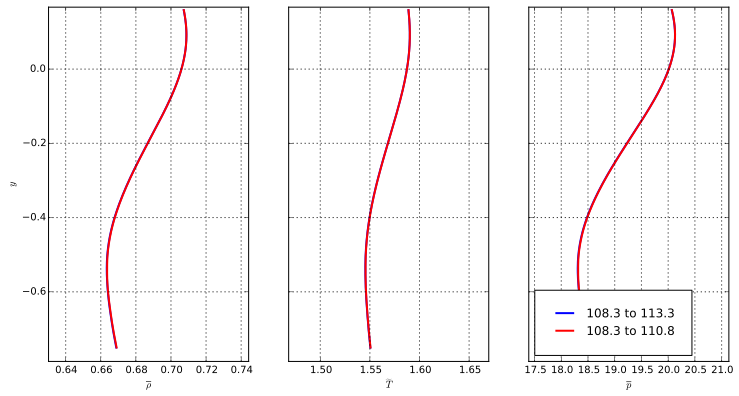

In [12]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,1))
plot_ids.append(wake[0].l[0].var.get_index(101,4))
plot_ids.append(wake[0].l[0].var.get_index(101,5))



for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_therm_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_therm_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.5975987
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9507253
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.032216
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1408703
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1951975
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.3038518
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplots

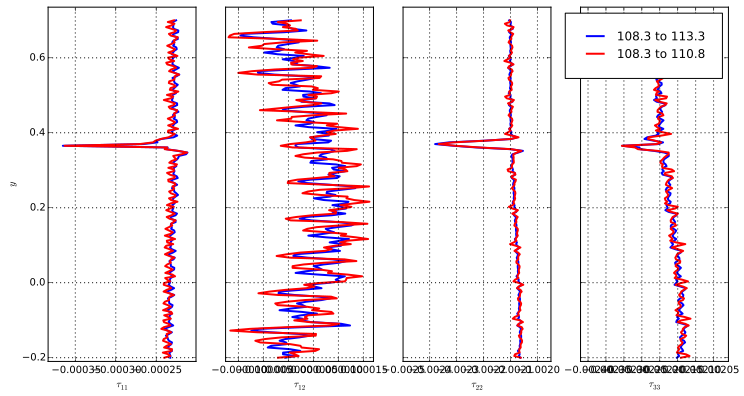

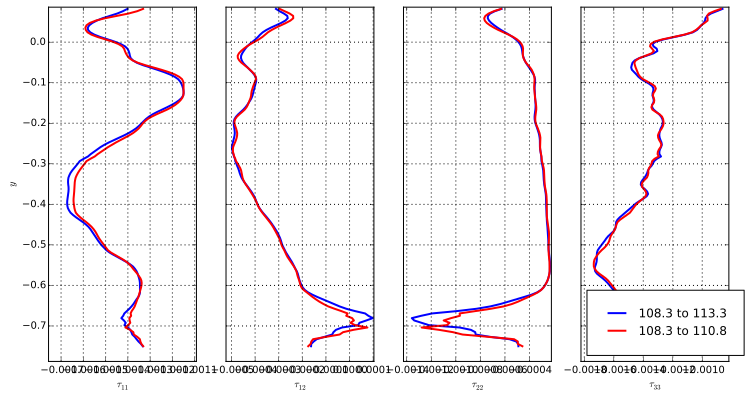

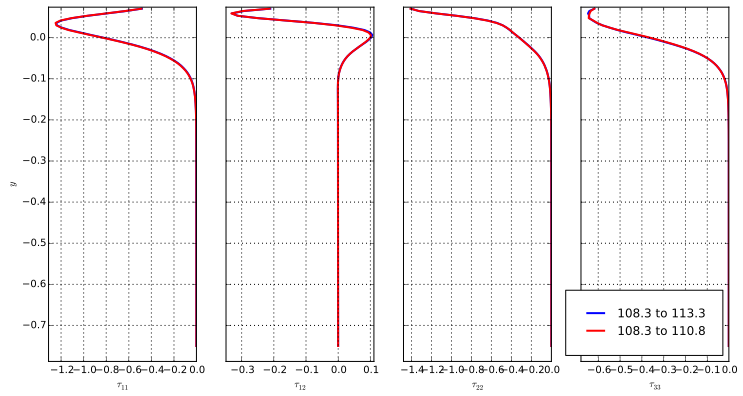

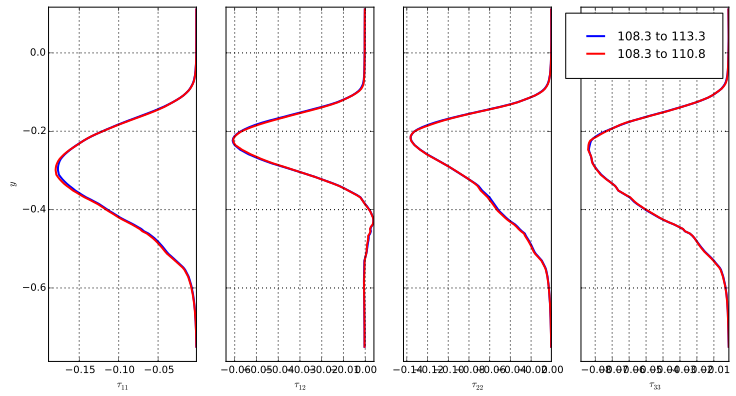

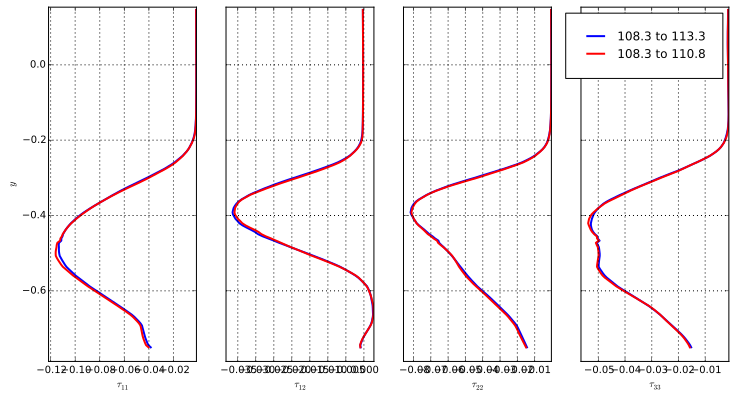

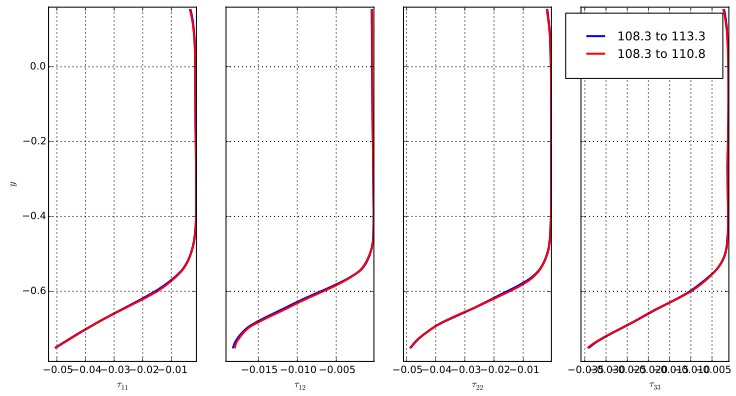

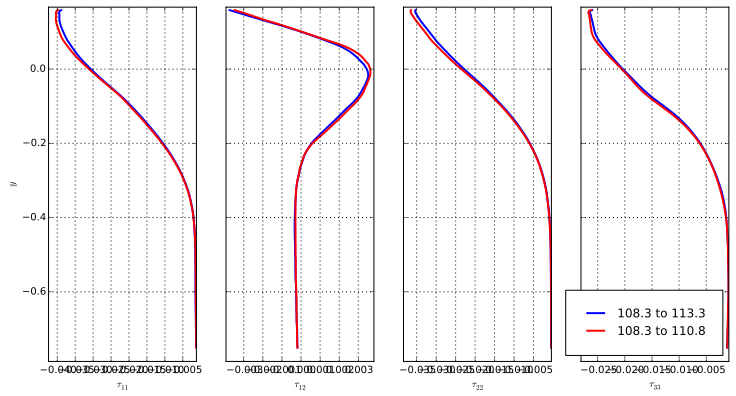

In [13]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,10))
plot_ids.append(wake[0].l[0].var.get_index(101,11))
plot_ids.append(wake[0].l[0].var.get_index(101,12))
plot_ids.append(wake[0].l[0].var.get_index(101,13))


for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tau_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tau_%s_%i.pdf"%(name_for_files,j))  

Wake profiles for x position:  -0.5975987
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  0.9507253
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.032216
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1408703
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.1951975
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{groupplots}
Wake profiles for x position:  1.3038518
file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplots

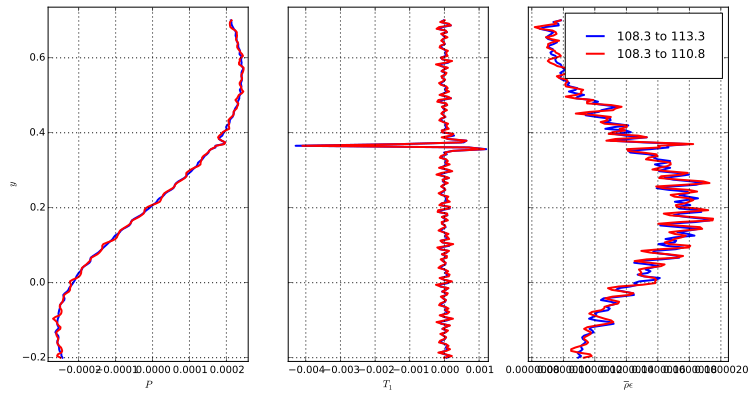

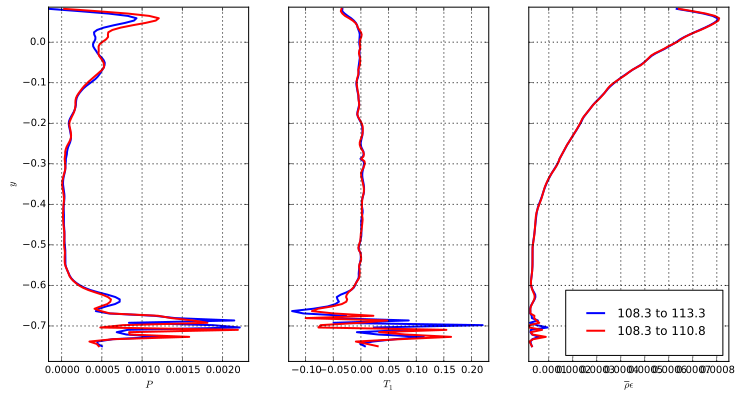

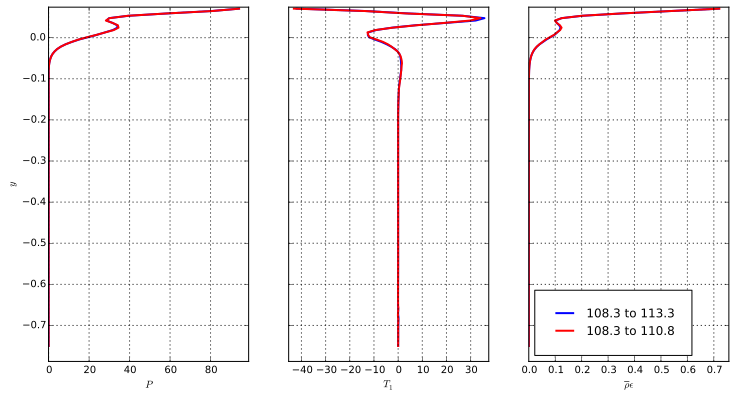

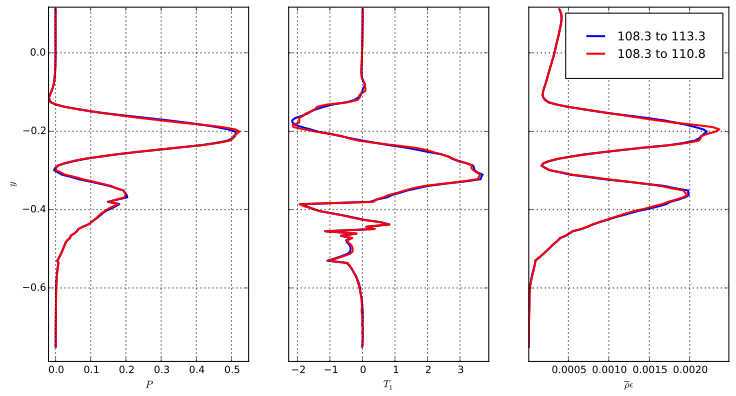

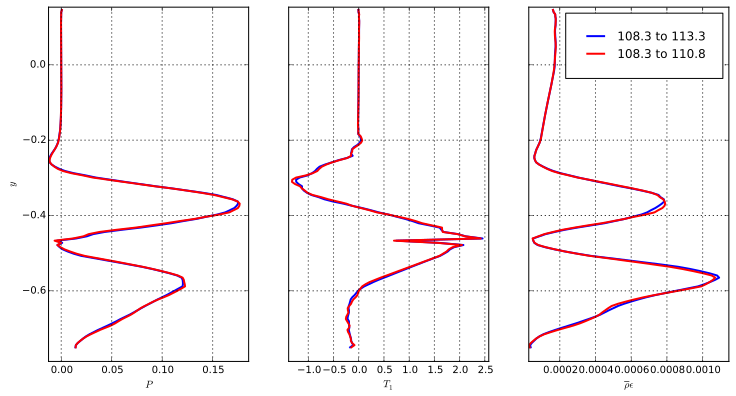

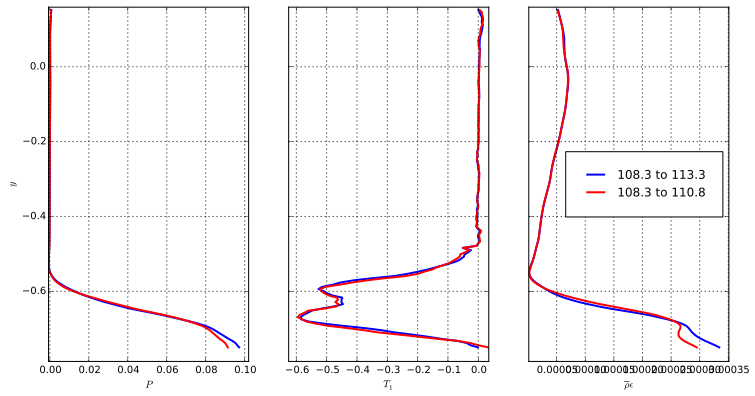

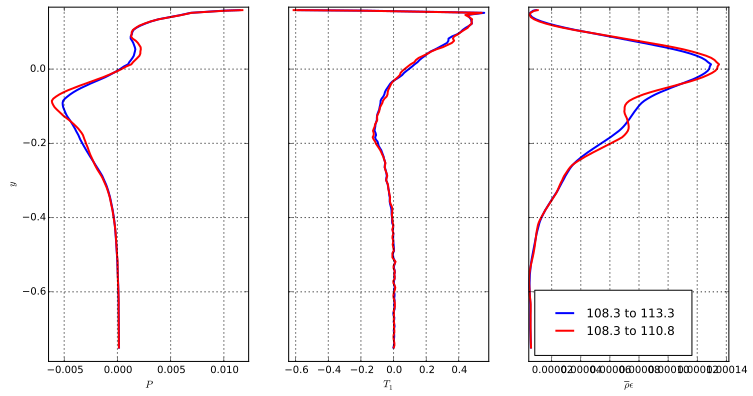

In [14]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(105,1))
plot_ids.append(wake[0].l[0].var.get_index(105,2))
plot_ids.append(wake[0].l[0].var.get_index(105,8))



for j in range(len(wake)):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tke_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tke_%s_%i.pdf"%(name_for_files,j))

## Selected case

In [11]:
case_index=1
filen='../convergence/'+postdir[case_index].split('/')[-1]+'/STAT_cont.bin'
print filen

../convergence/4330101_to_4430101/STAT_cont.bin


In [13]:
cascade=l.cascade_mean(-0.3,1.26,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.57)

reading data from file previously extracted
Extracting line
Found 197 points.
197
extract line from (i,j) 224 1  to  224 672  in block  4 672
672 672
extract line from (i,j) 224 1  to  224 224  in block  3 224
224 224
extract line from (i,j) 224 1  to  224 672  in block  5 672
672

/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1335: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1338: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1340: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1342: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:2515: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:


 672
extract line from (i,j) 224 1  to  224 384  in block  7 384
384 384
197 197
len=1.56703850627
197 197
len=1.56658673286
Warning!!!
chord length provided does not agree with chord length computed from the data
chord length is    1.7408688324
Warning!!!


/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1477: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:


In [ ]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.cp)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_p= \\frac{p(x)-p_{out}}{p_{t,in}-p_{out}}$')
tikz_save("cp_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [ ]:
plt.figure()
plt.plot(cascade.loss_mix,cascade.outlet.data[:,1])
plt.grid()
plt.ylabel('$x$')
plt.xlabel('$\omega= \\frac{p_{t,in}-p_{t,out}(y)}{p_{t,in}-p_{out}}$')
tikz_save("wake_loss.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [14]:
cascade.report_integral_mixed_out()

Isentropic Reynolds Number:    483444.72938
Isentropic Mach Number:    0.9192532187
Isentropic Reynolds Number:    490396.79265 (inlet mass averaged)
Isentropic Mach Number:    0.9192470277 (inlet mass averaged)
Isentropic exit Velocity:    5.6724406183
Mixed out loss    0.0323364716
Inlet angle:    0.0275908947
Inlet Mach number:    0.1480863507
Inlet stagnation pressure:   33.0257539703
Inlet stagnation Temperature:    1.8291057725
Inlet static pressure:   32.5237486007
Inlet static Temperature:    1.8211185044
Outlet angle:  -75.0716666880
Outlet Mach number:    0.9067400587
Outlet stagnation pressure:   32.5761011710
Outlet stagnation Temperature:    1.8228450027
Outlet static pressure:   19.1203160134
Outlet static Temperature:    1.5654323422
Outlet density:    0.6839884854


# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

In [ ]:
import mon_points as mp

## Write out data to compare cases

In [ ]:
case_index=0
print postdir[case_index]
stat_file=postdir[case_index]+'/ASME_post.bin'

In [ ]:
rho_ind=wake[1].l[case_index].var.get_index(216,1)
u_ind=wake[1].l[case_index].var.get_index(216,2)
v_ind=wake[1].l[case_index].var.get_index(216,3)
p_ind=wake[1].l[case_index].var.get_index(216,5)
T_ind=wake[1].l[case_index].var.get_index(216,4)
tau11_ind=wake[1].l[case_index].var.get_index(216,10)
tau22_ind=wake[1].l[case_index].var.get_index(216,12)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
tau12_ind=wake[1].l[case_index].var.get_index(216,11)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
P_ind=wake[1].l[case_index].var.get_index(209,8)
eps_ind=wake[1].l[case_index].var.get_index(209,9)
k_ind=wake[1].l[case_index].var.get_index(207,1)
Ti_ind=wake[1].l[case_index].var.get_index(216,21)

In [ ]:
for i in range(3):
    dataset=wake[i+1].l[case_index]
    outlet_comp_file='outlet_comp_%s_%i.dat'%(name_for_files,i+1)
    of=open(outlet_comp_file,'w')
    of.write('%25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s\n'%('y','rho_bar','u_tile','v_tile','p_bar','T_tile','tau_11,','tau_22','tau_33','tau_12,','k','P','epsilon'))
    of.write('x=%15.8f, npoints = %i\n'%(dataset.data[0,0],dataset.npoints))    
    for j in range(dataset.npoints):
            of.write('%25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f\n'%(dataset.data[j,1],dataset.data[j,rho_ind],dataset.data[j,u_ind],dataset.data[j,v_ind],
                                   dataset.data[j,p_ind],dataset.data[j,T_ind],-dataset.data[j,tau11_ind],-dataset.data[j,tau22_ind],
                                   -dataset.data[j,tau33_ind],-dataset.data[j,tau12_ind],dataset.data[j,k_ind],-dataset.data[j,P_ind],dataset.data[j,eps_ind]))          
    of.close()